In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel('/content/drive/MyDrive/csv-data/Bakery-labeled.xlsx', sheet_name='data', header=0)
label=pd.read_excel('/content/drive/MyDrive/csv-data/Bakery-labeled.xlsx', sheet_name='label', header=0)

b_dic=dict(zip(label.Name,label.Label))
data['label']=data['Items'].apply(lambda x: b_dic[x])

data['Date']=data['DateTime'].dt.date
week_data=data[data.DayType=='Weekday']
weekend_data=data[data.DayType=='Weekend']

data_table=data[['label','Date','TransactionNo']].pivot_table(index='Date', columns='label', aggfunc='count')
week_table=week_data[['label','Date','TransactionNo']].pivot_table(index='Date', columns='label', aggfunc='count')
weekend_table=weekend_data[['label','Date','TransactionNo']].pivot_table(index='Date', columns='label', aggfunc='count')

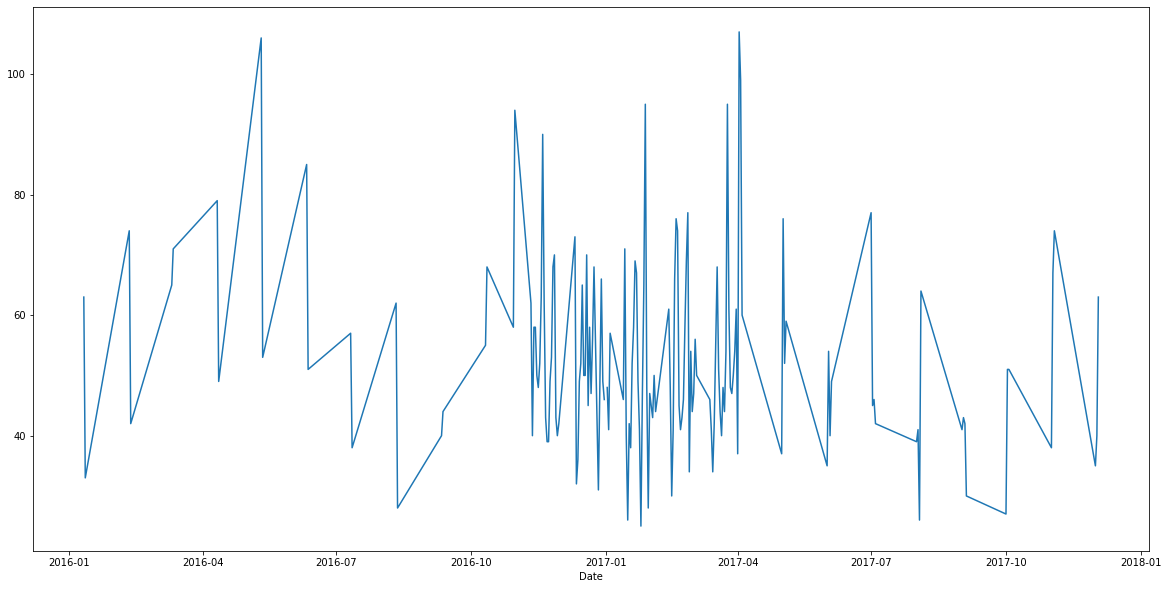

In [3]:
plt.figure(figsize=(20,10))
data_table[('TransactionNo', 'Beverage')].plot()

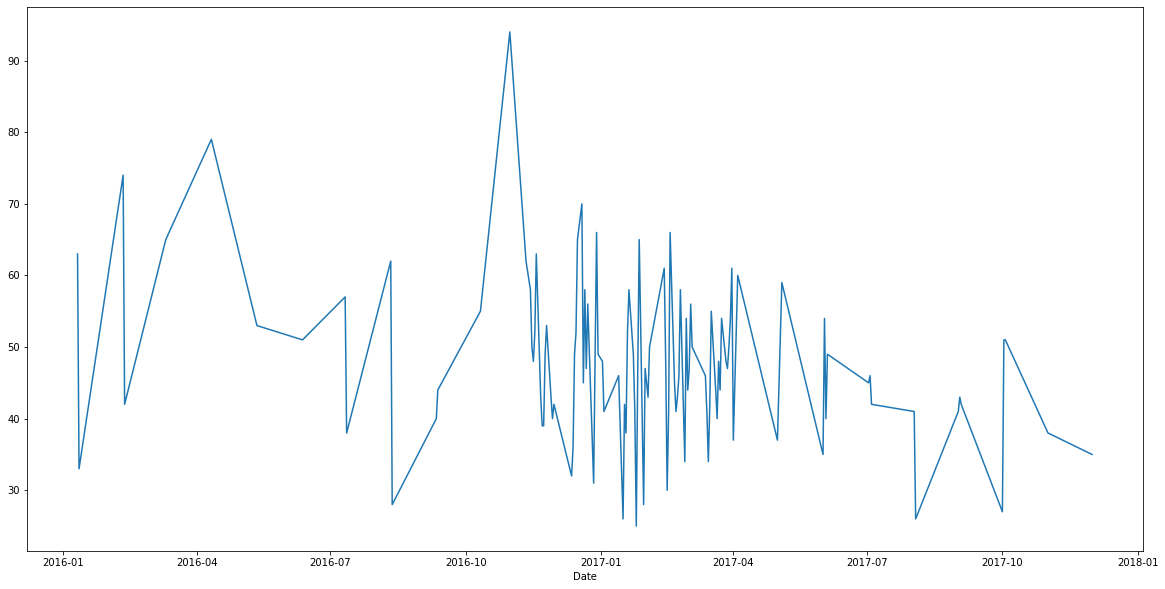

In [4]:
plt.figure(figsize=(20,10))
week_table[('TransactionNo', 'Beverage')].plot()

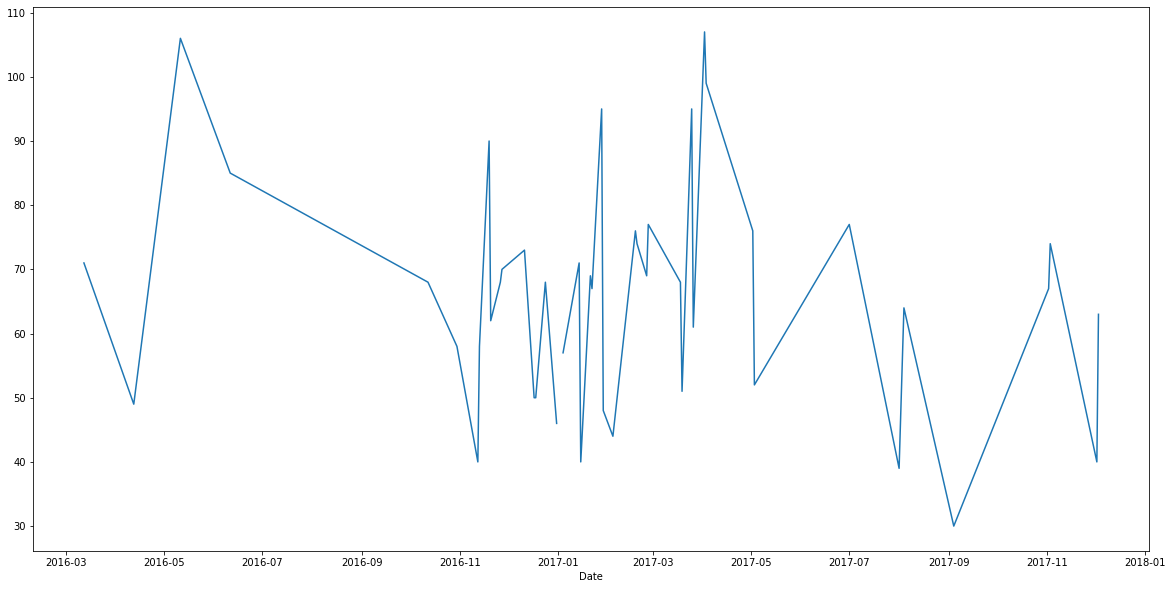

In [5]:
plt.figure(figsize=(20,10))
weekend_table[('TransactionNo', 'Beverage')].plot()

In [6]:
from fbprophet import Prophet

In [9]:
df=data_table[('TransactionNo', 'Beverage')].reset_index()
df.columns=['ds','y']
df

,ds,y
0,2016-01-11,63.0
1,2016-01-12,33.0
2,2016-02-11,74.0
3,2016-02-12,42.0
4,2016-03-11,65.0
...,...,...
154,2017-11-02,67.0
155,2017-11-03,74.0
156,2017-12-01,35.0
157,2017-12-02,40.0


In [13]:
# prophet model object 생성
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality=True, 
                 weekly_seasonality=True,
                 daily_seasonality=False,
                 changepoint_prior_scale=0.5) # fitting 정도 설정

# Training
prophet.fit(df)

# Forecasting
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')
forecast_data = prophet.predict(future_data)
#forecast_data.head()
forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
159,2017-12-04,40.585481,24.884670,56.670230
160,2017-12-05,34.114536,18.483512,50.441986
161,2017-12-06,36.107819,18.640758,50.856643
162,2017-12-07,39.707112,23.608459,55.917307
163,2017-12-08,46.361639,29.700330,61.728714


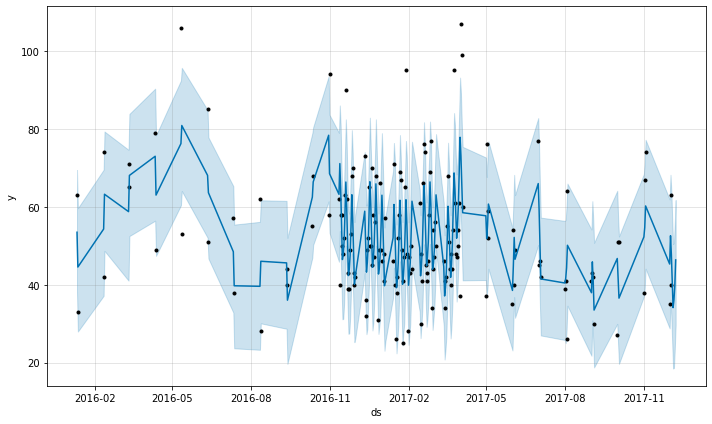

In [14]:
fig1 = prophet.plot(forecast_data)

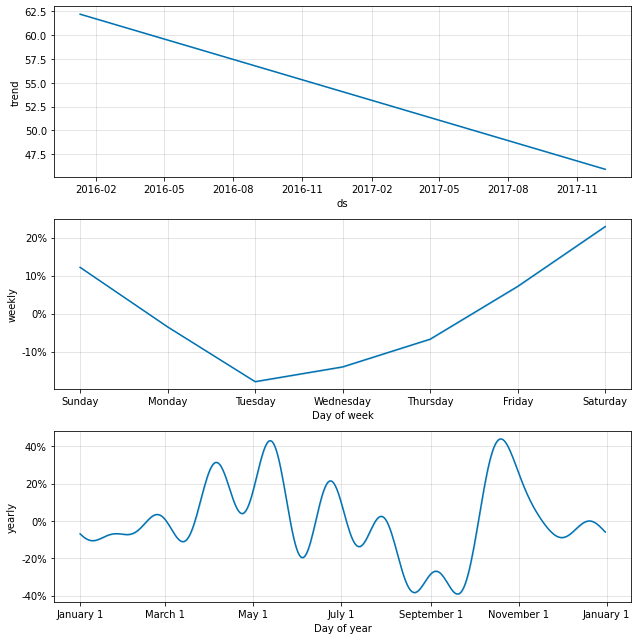

In [15]:
fig2 = prophet.plot_components(forecast_data)

Bakery Sales Dataset 시계열 분석 결과 - 음료
- 전체 매출 트렌드 분석 : 현재 매출이 하향세에 있으므로, 향후 적극적인 마케팅이 요구됨
- 요일별 매출 분석 : 본 매장은 주중 수요보다 주말 수요가 더 많은 매장으로 분석됨. 특히 화요일의 매출이 가장 낮으므로, 일주일 중 휴일은 화요일이 가장 적합하다고 판단됨
- 연간 매출 분석 : 9월1일 근처에 매출이 적고 5월과 10월에 매출이 많은 것으로 판단됨. 여름과 겨울 매출 증대를 위한 노력이 요구됨. (예. 여름, 겨울 seasonal 음료 menu 개발)

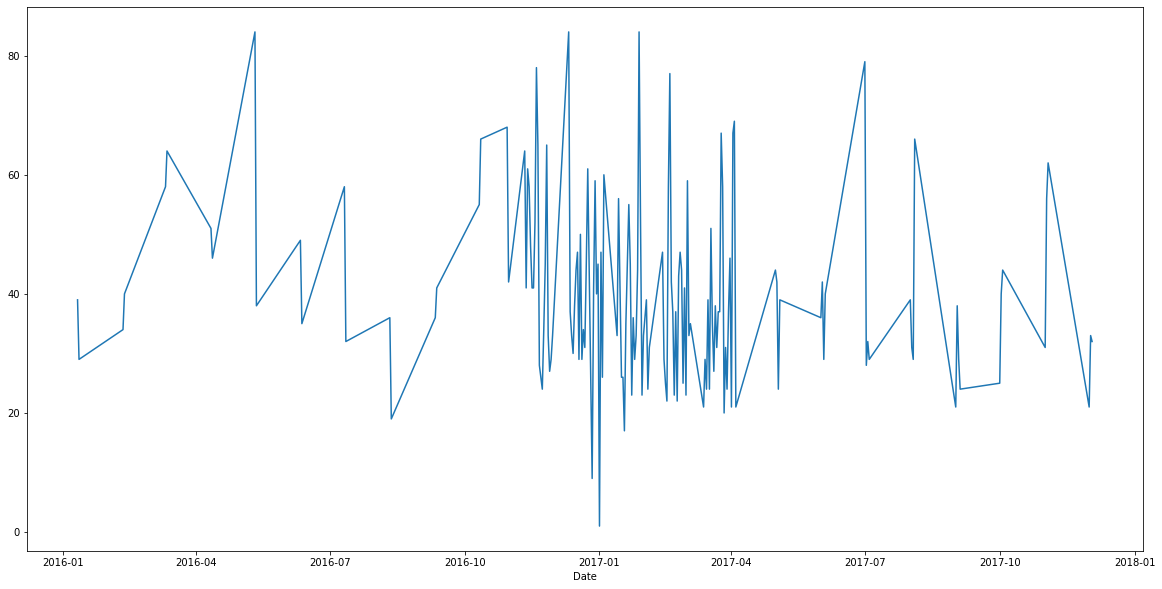

In [16]:
plt.figure(figsize=(20,10))
data_table[('TransactionNo', 'Bread')].plot()

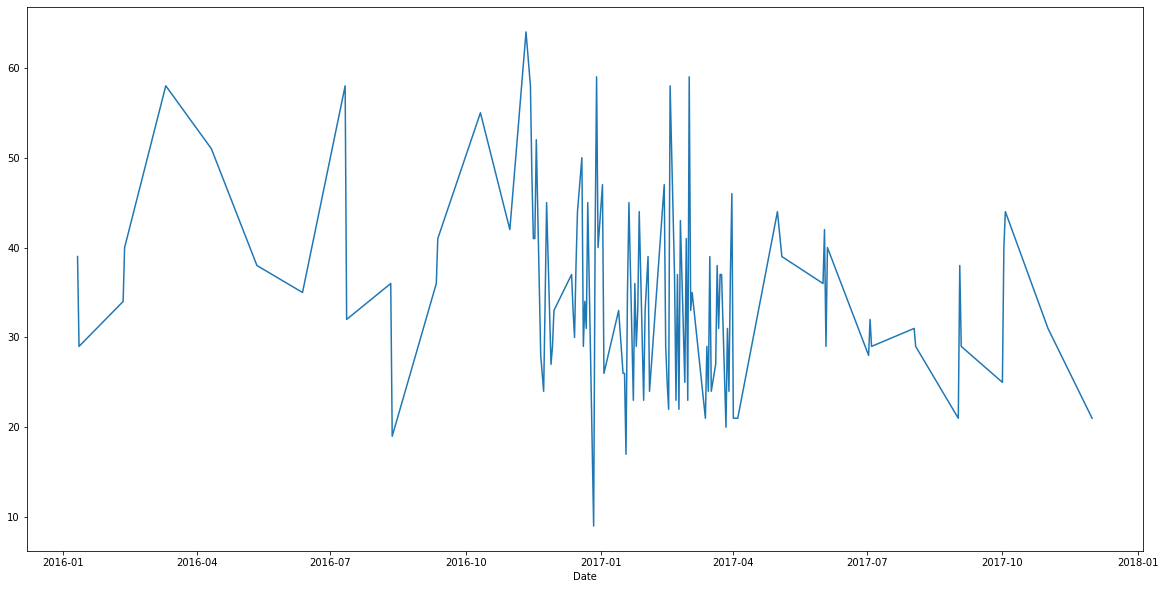

In [17]:
plt.figure(figsize=(20,10))
week_table[('TransactionNo', 'Bread')].plot()

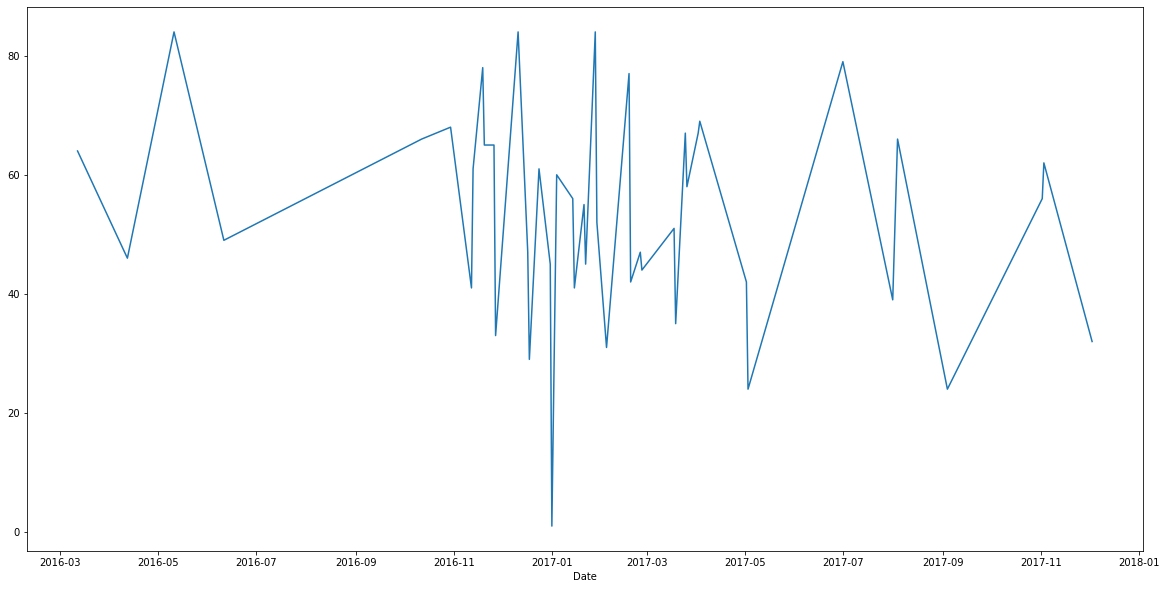

In [18]:
plt.figure(figsize=(20,10))
weekend_table[('TransactionNo', 'Bread')].plot()

In [19]:
df=data_table[('TransactionNo', 'Bread')].reset_index()
df.columns=['ds','y']

In [20]:
# prophet model object 생성
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality=True, 
                 weekly_seasonality=True,
                 daily_seasonality=False,
                 changepoint_prior_scale=0.5) # fitting 정도 설정

# Training
prophet.fit(df)

# Forecasting
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')
forecast_data = prophet.predict(future_data)
#forecast_data.head()
forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
159,2017-12-04,26.410231,10.573839,41.694510
160,2017-12-05,21.754977,6.555361,37.104997
161,2017-12-06,23.880883,8.266910,40.201633
162,2017-12-07,26.921446,11.804092,43.062357
163,2017-12-08,32.616425,17.710048,47.923262


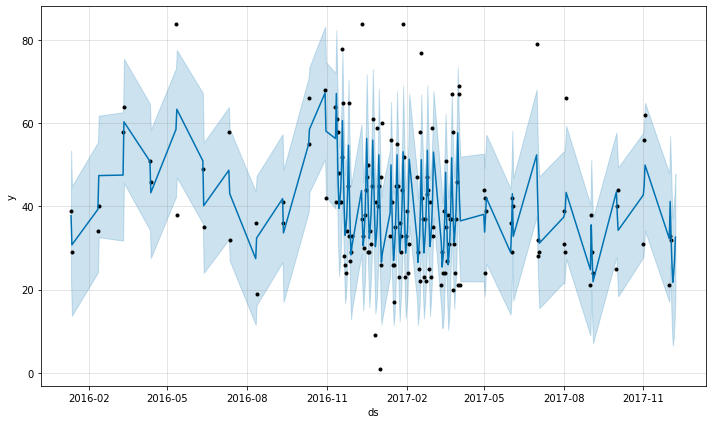

In [21]:
fig1 = prophet.plot(forecast_data)

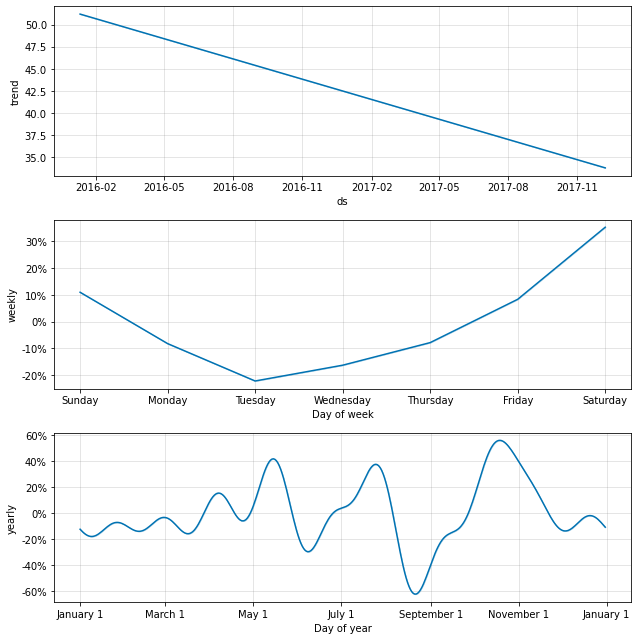

In [22]:
fig2 = prophet.plot_components(forecast_data)

Bakery Sales Dataset 시계열 분석 결과 - 빵
- 전체 매출 트렌드 분석 : 빵 역시 전체적으로 매출이 감소세에 있음
- 요일별 매출 분석1 : 역시 화요일 매출이 가장 낮음
- 요일별 매출 분석2 : 빵 매출의 경우, 음료보다 주말효과가 더 큼. 빵의 화요일 매출 감소폭과 토요일 매출 증가폭이 음료의 변화폭보다 더 큼
- 연간 매출 분석 : 8월에 매출이 작고 5월과 10월에 매출이 많은 것으로 판단됨. 이는 음료와 비슷한 움직임을 보임

In [23]:
df=data_table[('TransactionNo', 'Meal')].reset_index()
df.columns=['ds','y']

In [24]:
# prophet model object 생성
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality=True, 
                 weekly_seasonality=True,
                 daily_seasonality=False,
                 changepoint_prior_scale=0.5) # fitting 정도 설정

# Training
prophet.fit(df)

# Forecasting
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')
forecast_data = prophet.predict(future_data)
#forecast_data.head()
forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
159,2017-12-04,7.128658,1.607600,12.597382
160,2017-12-05,3.333384,-1.998857,8.949946
161,2017-12-06,2.216307,-3.287286,7.935655
162,2017-12-07,3.596526,-1.859395,9.032970
163,2017-12-08,3.216929,-2.507810,8.559369


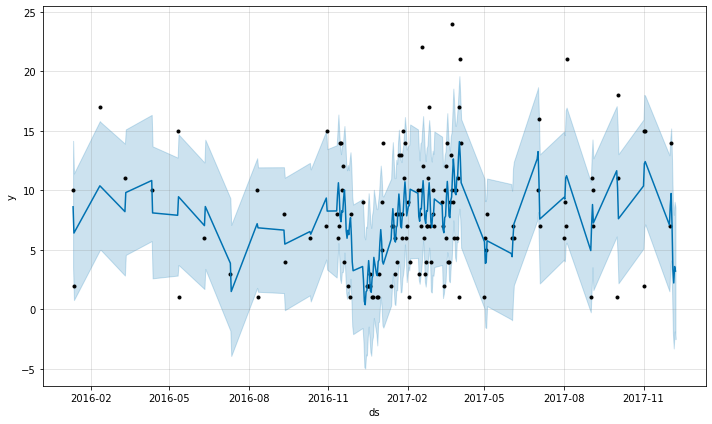

In [25]:
fig1 = prophet.plot(forecast_data)

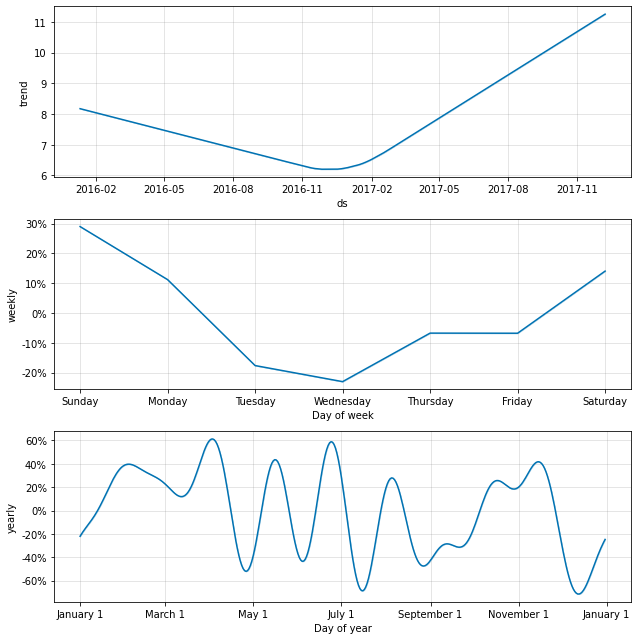

In [26]:
fig2 = prophet.plot_components(forecast_data)

Bakery Sales Dataset 시계열 분석 결과 - 식사메뉴
- 전체 매출 트렌드 분석 : 빵, 음료와는 달리, 식사메뉴는 매출 증가세에 있음
- 요일별 매출 분석2 : 화/수요일 매출이 적고, 토/일 매출이 많은 것은 타 메뉴들과 비슷하나, 토요일보다 일요일에 매출이 더 많은 특이한 경향이 보임
- 연간 매출 분석 : 월별 변동폭이 커, 아직 cash cow menu로는 적합치 않음
- 장기적으로, 식사메뉴가 주력 메뉴는 아니지만, 증가세에 있는 식사메뉴에 투자하여 타 메뉴와의 시너지 효과를 도모할 필요가 있음